# World Happiness Report Project

Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset.


In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [126]:
#Loading the dataset
whd_df = pd.read_csv("happiness_score_dataset.csv")
print("Successfully Imported Data!")
whd_df

Successfully Imported Data!


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [127]:
whd_df.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [128]:
whd_df.tail(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [129]:
whd_df.columns 

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [130]:
#Converting all column names to lowercase.
whd_df.columns=whd_df.columns.str.lower()


In [131]:
whd_df.columns

Index(['country', 'region', 'happiness rank', 'happiness score',
       'standard error', 'economy (gdp per capita)', 'family',
       'health (life expectancy)', 'freedom', 'trust (government corruption)',
       'generosity', 'dystopia residual'],
      dtype='object')

In [132]:
whd_df

,country,region,happiness rank,happiness score,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [133]:
print('No of rows in the data set:- ',whd_df.shape[0])
print('No of columns in the data set:- ',whd_df.shape[1])

No of rows in the data set:-  158
No of columns in the data set:-  12


This dataset contains 158 rows and 12 Columns.

In [134]:
whd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        158 non-null    object 
 1   region                         158 non-null    object 
 2   happiness rank                 158 non-null    int64  
 3   happiness score                158 non-null    float64
 4   standard error                 158 non-null    float64
 5   economy (gdp per capita)       158 non-null    float64
 6   family                         158 non-null    float64
 7   health (life expectancy)       158 non-null    float64
 8   freedom                        158 non-null    float64
 9   trust (government corruption)  158 non-null    float64
 10  generosity                     158 non-null    float64
 11  dystopia residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

--This dataset contains 2 columns with object values 1 with integer value and the rest contains float values.

In [135]:
# Checking for null values if any
whd_df.isnull().sum()

country                          0
region                           0
happiness rank                   0
happiness score                  0
standard error                   0
economy (gdp per capita)         0
family                           0
health (life expectancy)         0
freedom                          0
trust (government corruption)    0
generosity                       0
dystopia residual                0
dtype: int64

There are no missing values present in this dataset

<AxesSubplot:>

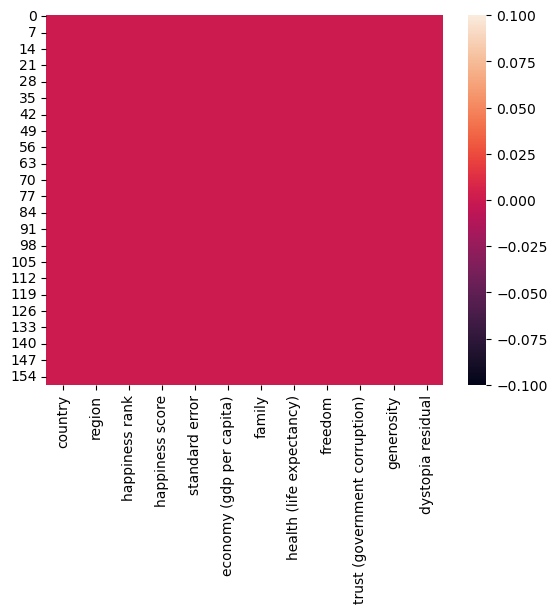

In [136]:
sns.heatmap(whd_df.isnull())

In [137]:
# Checking for white spaces
#pd.options.display.max_rows=None  -- this check all the dataset
whd_df.loc[0:]==" "


,country,region,happiness rank,happiness score,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
153,False,False,False,False,False,False,False,False,False,False,False,False
154,False,False,False,False,False,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False,False,False,False,False,False


This dataset contains no white spaces

In [138]:
#Check for duplicate data
whd_df.duplicated().sum()

0

No duplicates in database

In [139]:
whd_df.nunique().to_frame('No of unique values')

,No of unique values
country,158
region,10
happiness rank,157
happiness score,157
standard error,153
economy (gdp per capita),158
family,158
health (life expectancy),157
freedom,158
trust (government corruption),157


In [140]:
whd_df['happiness score'].max()

7.587

- Maximun Happiness score is 7.58.

In [141]:
whd_df['happiness score'].min()

2.839

- Minimum Happiness score is 2.83.

In [142]:
#Checking description of dataset
whd_df.describe()

,happiness rank,happiness score,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


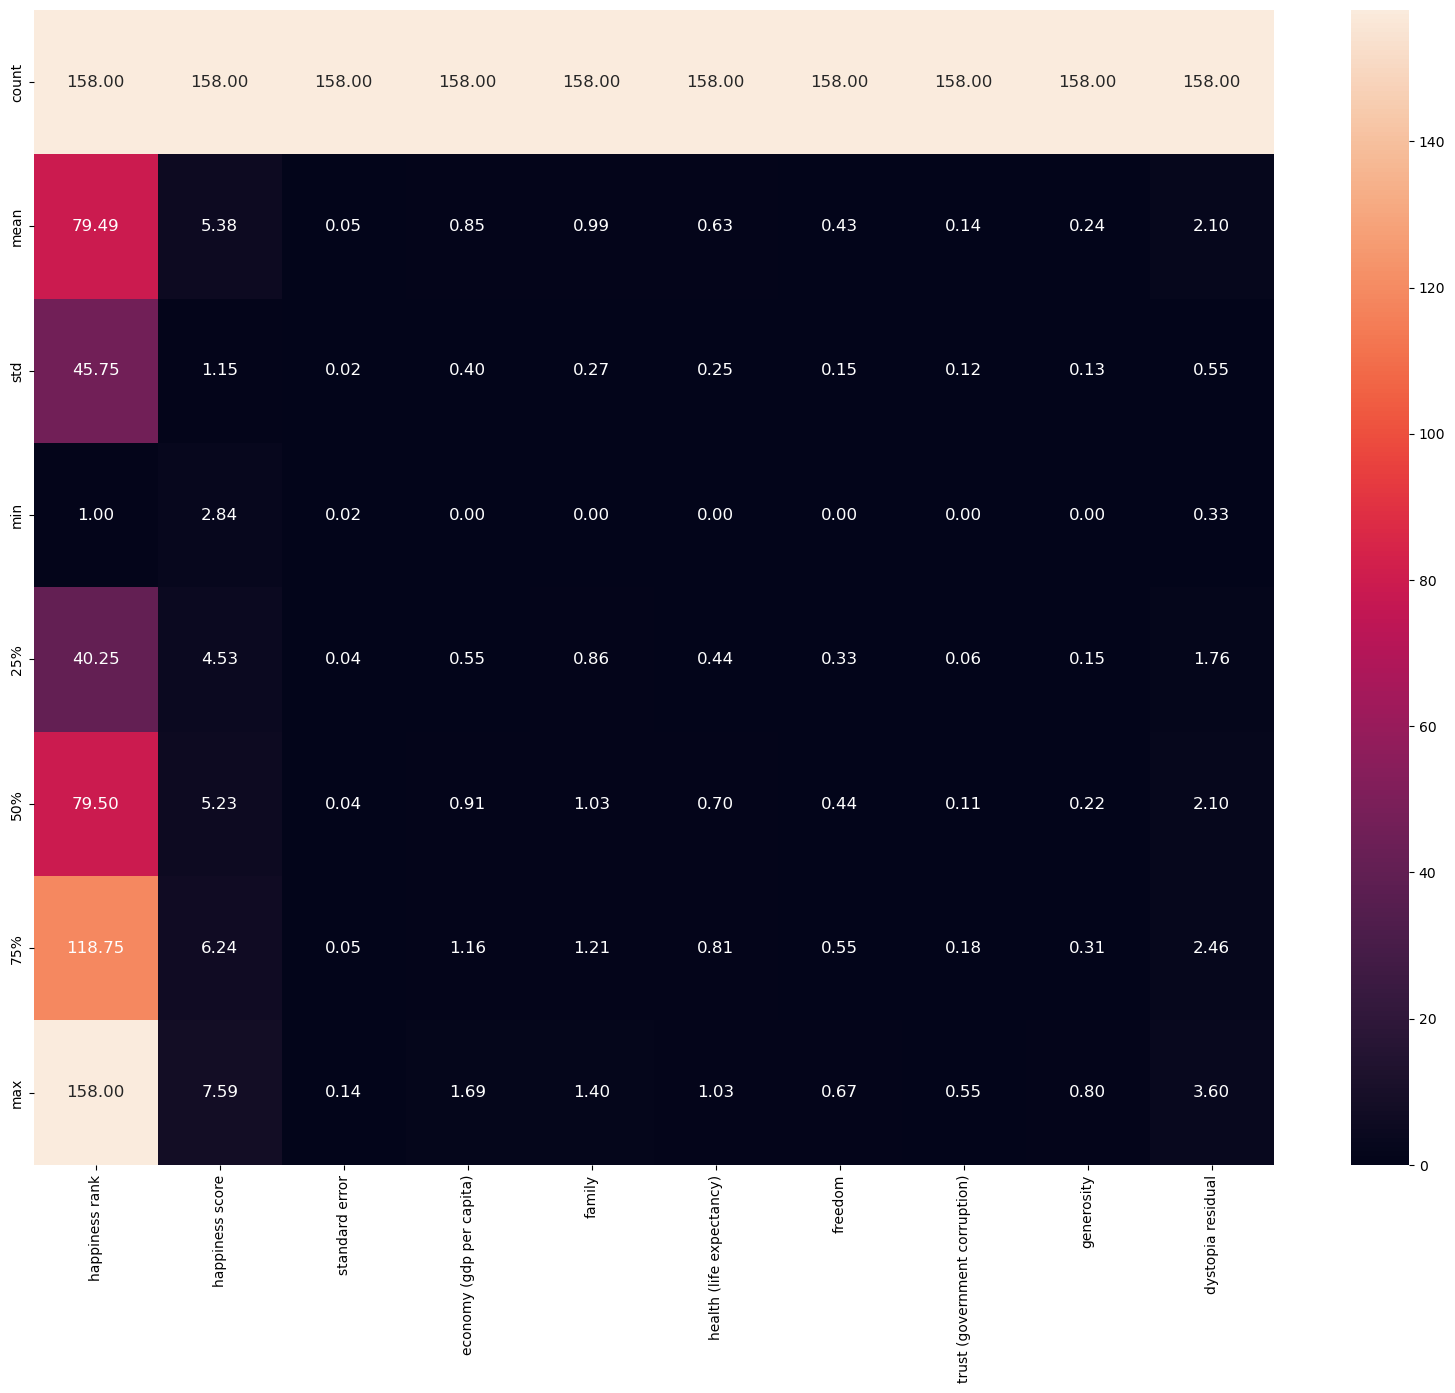

In [143]:

plt.figure(figsize=(20,15))
sns.heatmap(whd_df.describe(),annot=True,fmt='.2f',annot_kws={'size':12})

plt.show()

1. The mean and median of all columns are nearby equal, and thus we can say they are normally distributed. 
2. The max of the Happiness rank column is  high than median, and thus we can say outliers is present in Happiness rank columns




# Data Visualization

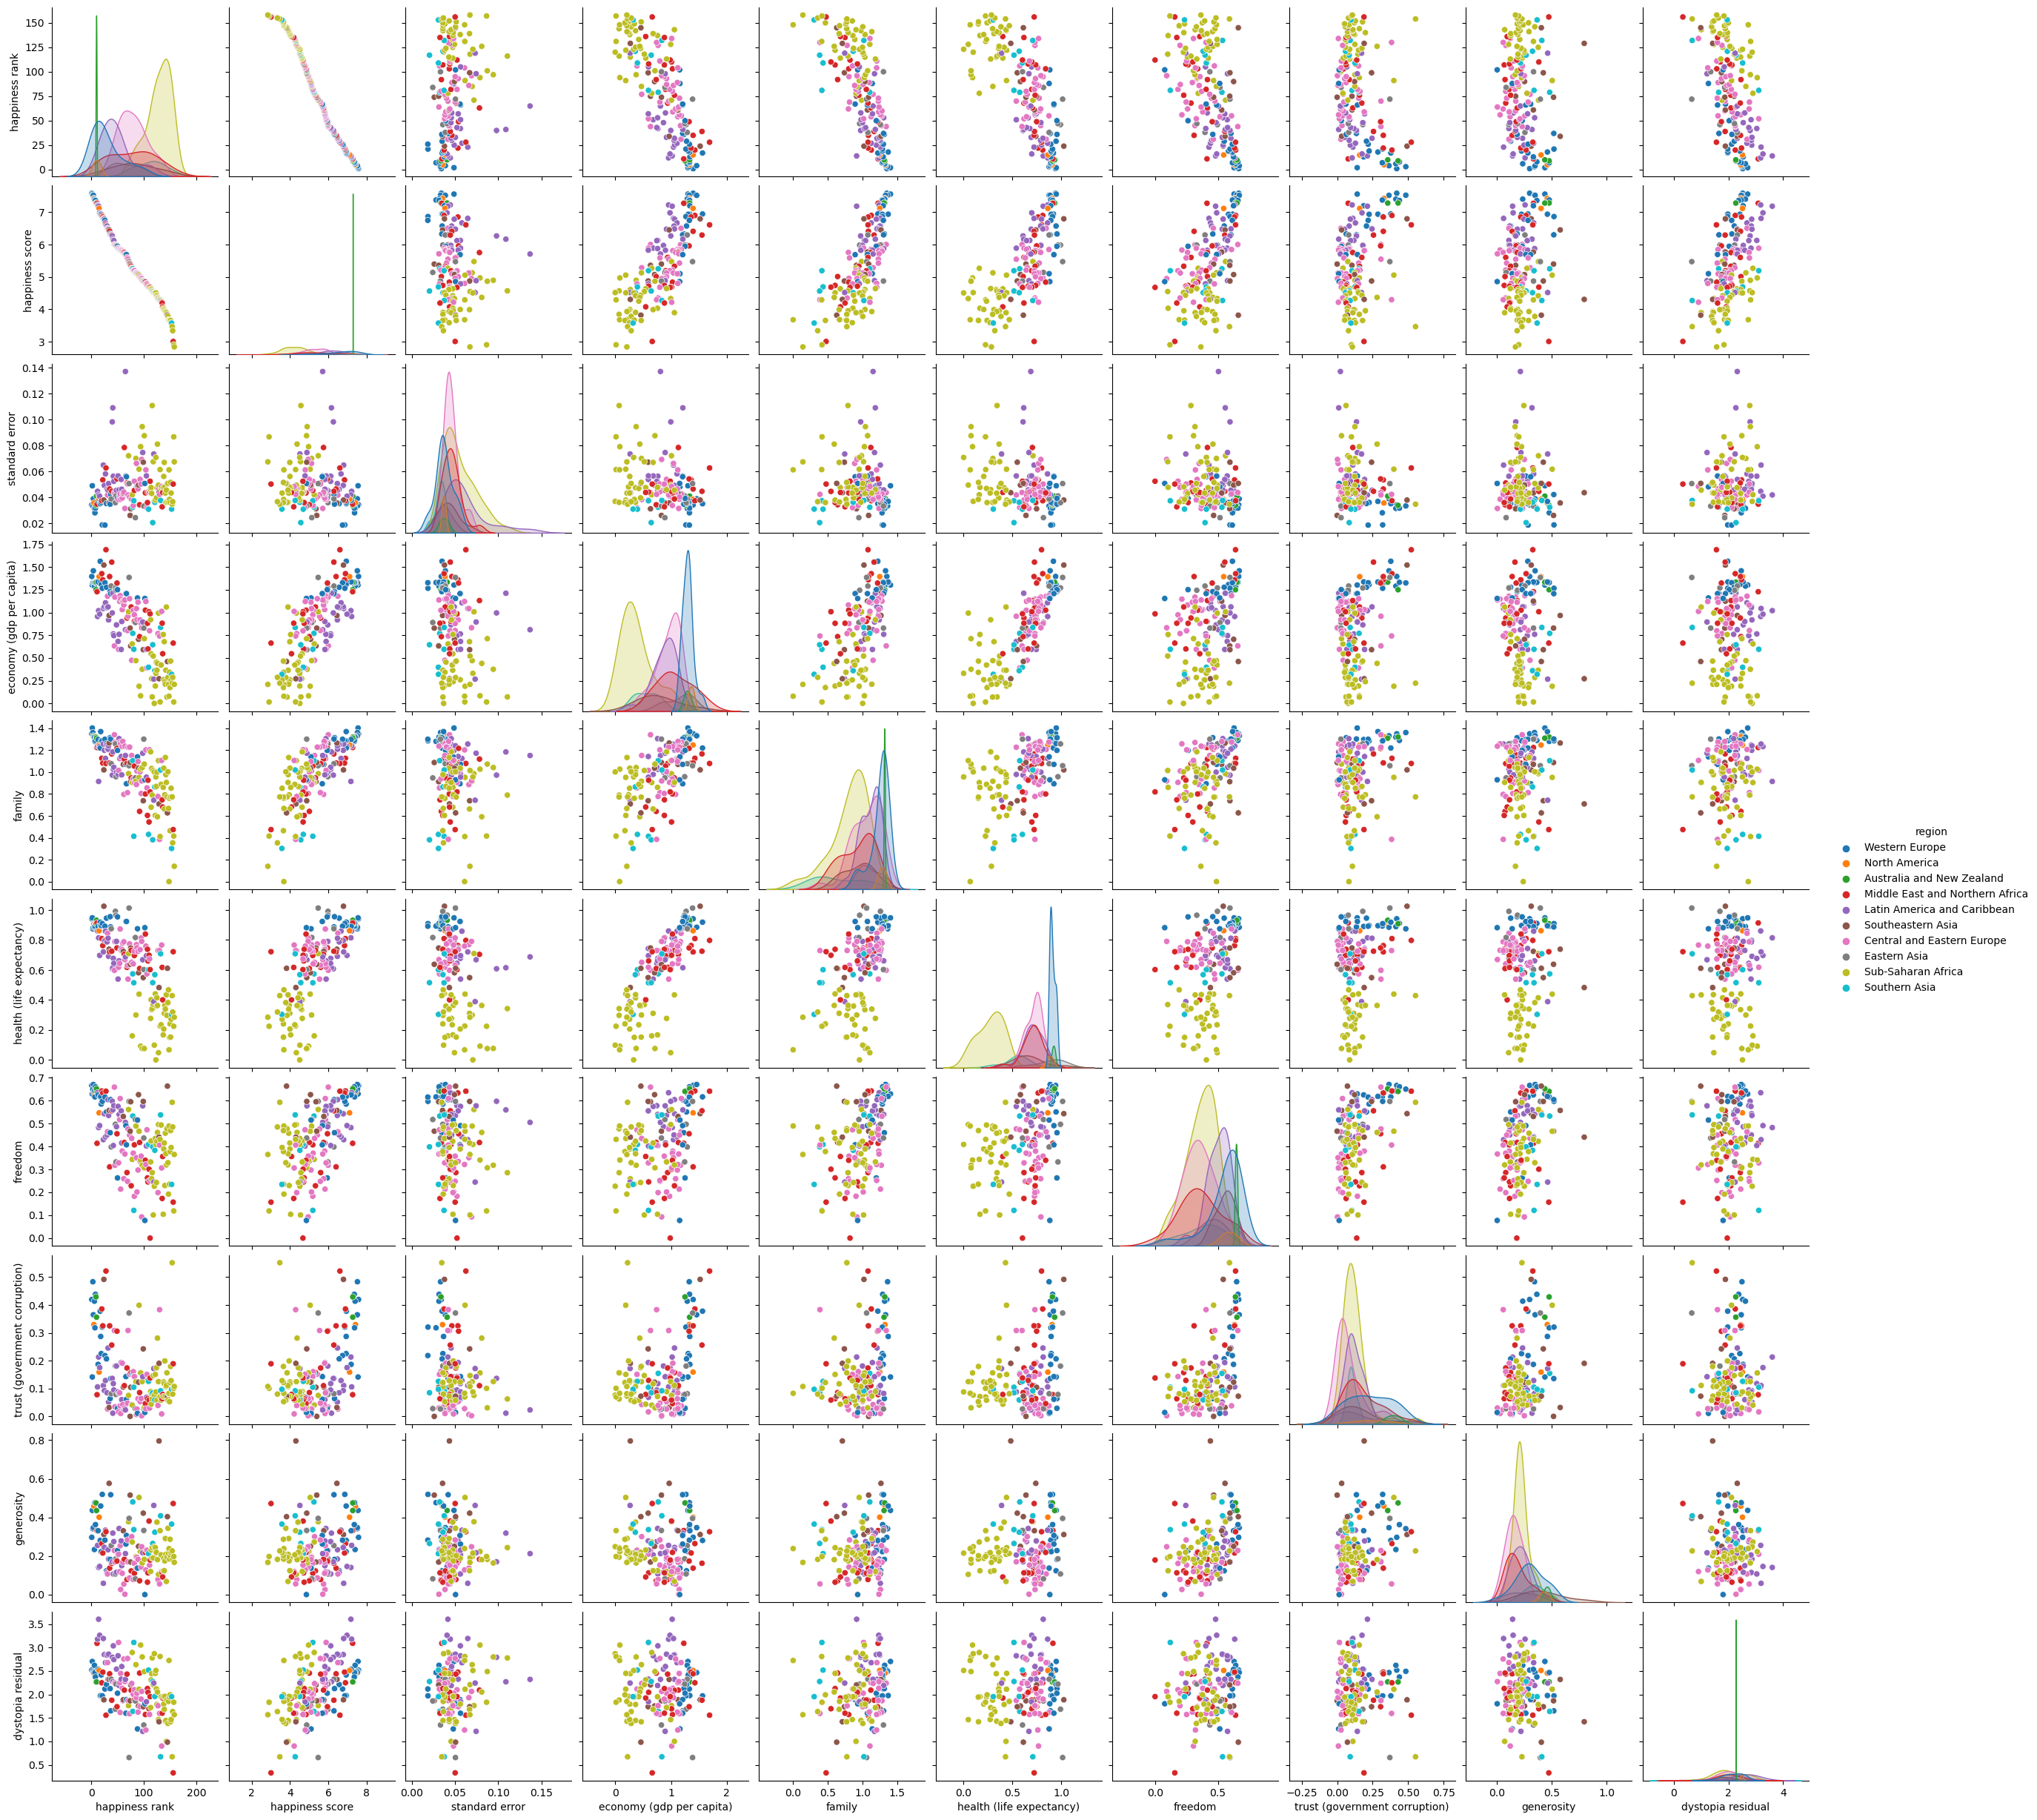

In [144]:
sns.pairplot(whd_df,hue = 'region')

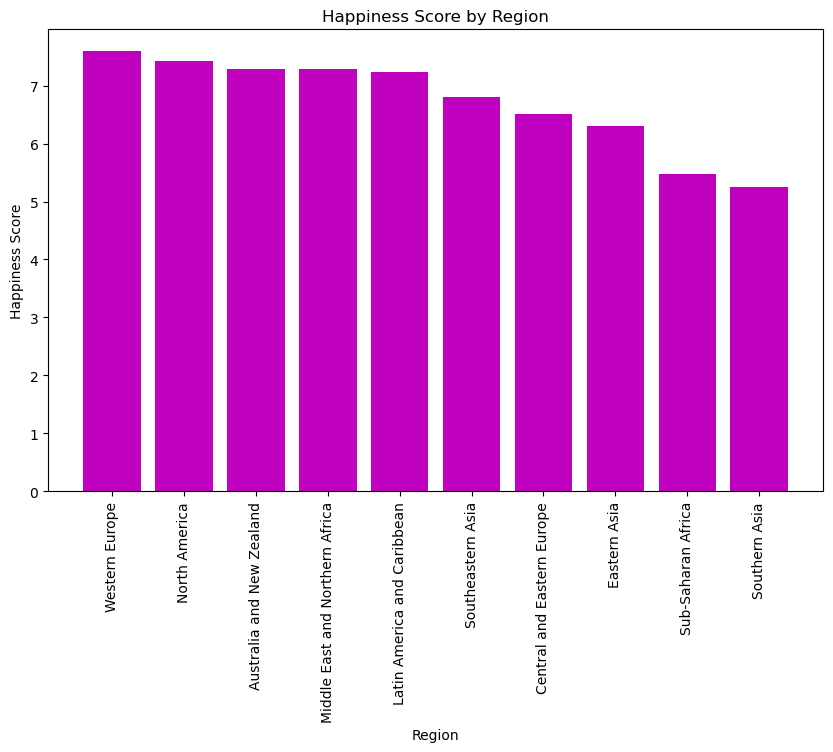

In [145]:
region = whd_df['region']
happy_score = whd_df['happiness score']



# Create a bar plot with region as x-axis and happiness score as y-axis
plt.figure(figsize=(10,6)) # Adjust the figure size
plt.bar(region, happy_score, color="m") # Plot the bars
plt.xticks(rotation=90) # Rotate the x-axis labels for readability
plt.xlabel("Region") # Add x-axis label
plt.ylabel("Happiness Score") # Add y-axis label
plt.title("Happiness Score by Region") # Add title
plt.show() # Show the plot

- As we can see not much difference in Happyness score in different regions

# Checking How Happiness score affects by other factors

<AxesSubplot:xlabel='standard error', ylabel='happiness score'>

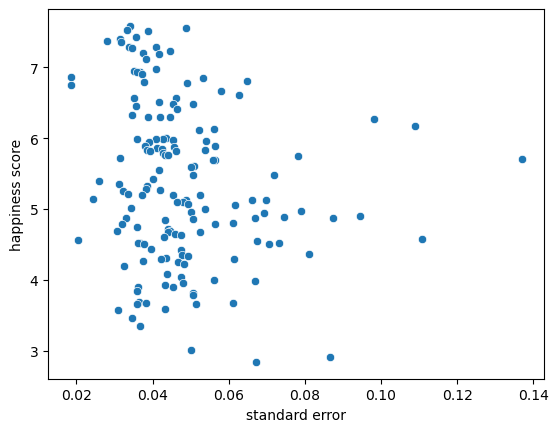

In [146]:
# Happiness Score Vs Standard error
sns.scatterplot(x='standard error',y='happiness score',data=whd_df)

- We Can see Not any relationship

<AxesSubplot:xlabel='economy (gdp per capita)', ylabel='happiness score'>

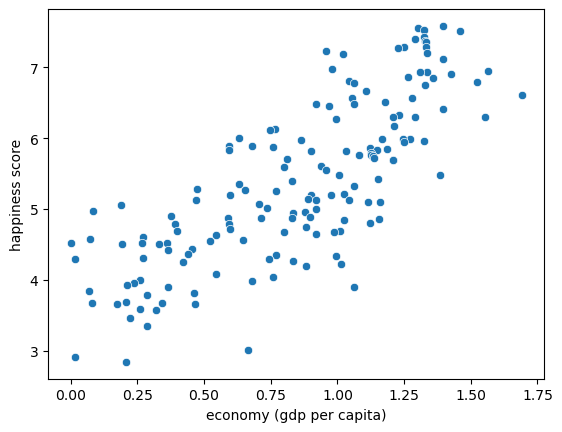

In [147]:
# Happiness Score Vs economy (gdp per capita)
sns.scatterplot(x='economy (gdp per capita)',y='happiness score',data=whd_df)

- We can see As economy increases happiness score will also increases

<AxesSubplot:xlabel='family', ylabel='happiness score'>

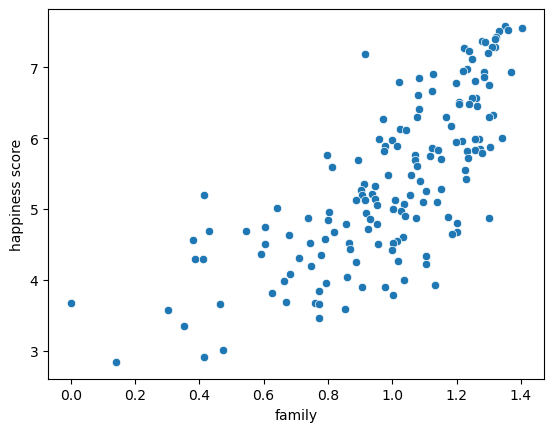

In [148]:
# Happiness Score Vs family
sns.scatterplot(x='family',y='happiness score',data=whd_df)

- Happiness score increases with increasing the value of family

<AxesSubplot:xlabel='health (life expectancy)', ylabel='happiness score'>

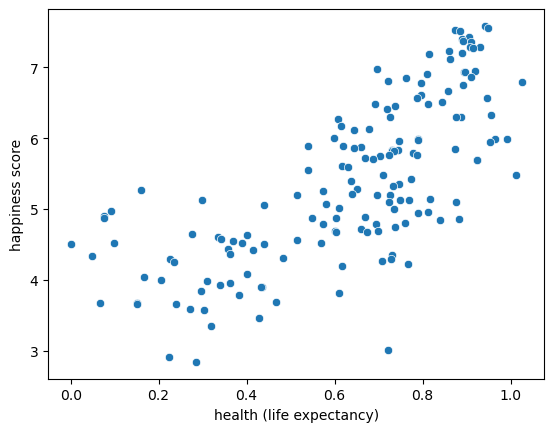

In [149]:
# Happiness Score Vs 'health(life expectancy)
sns.scatterplot(x='health (life expectancy)',y='happiness score',data=whd_df)

- As we can see happiness score increases with increase in health

<AxesSubplot:xlabel='freedom', ylabel='happiness score'>

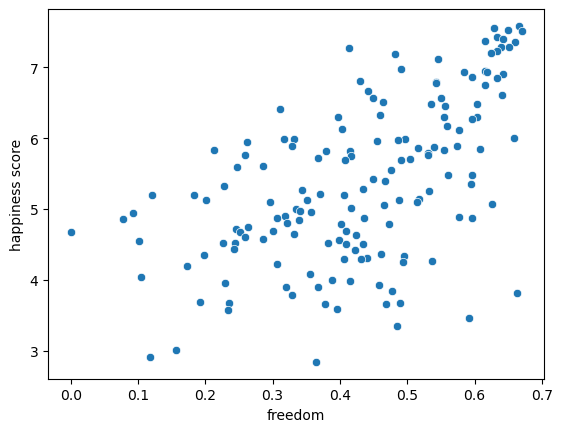

In [150]:
# Happiness Score Vs freedom
sns.scatterplot(x='freedom',y='happiness score',data=whd_df)

- As we can see happiness score increases with increase in Freedom

<AxesSubplot:xlabel='trust (government corruption)', ylabel='happiness score'>

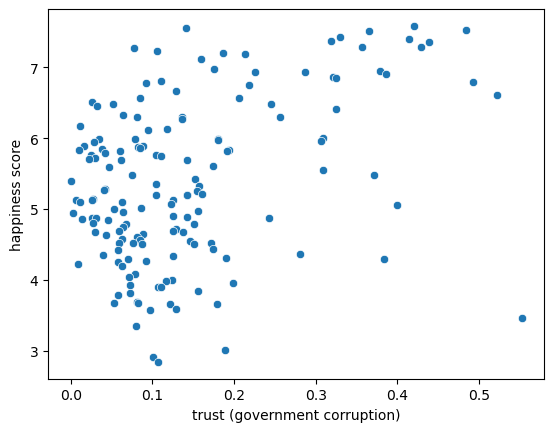

In [151]:
# Happiness Score Vs trust (government corruption)
sns.scatterplot(x='trust (government corruption)',y='happiness score',data=whd_df)

- As we can see happiness score decreases with increase in corruption

<AxesSubplot:xlabel='generosity', ylabel='happiness score'>

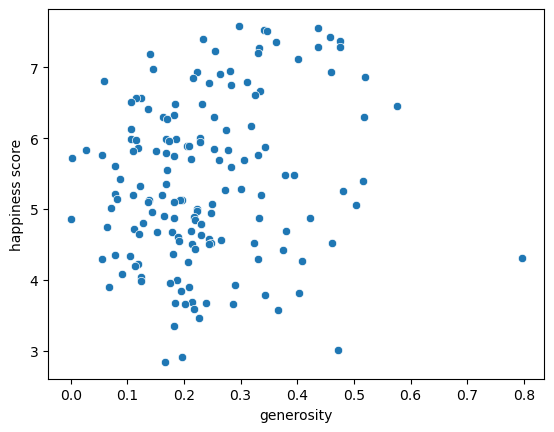

In [152]:
# Happiness Score Vs generosity
sns.scatterplot(x='generosity',y='happiness score',data=whd_df)

- As we can see happiness score decreases with increase in generosity

- Economy (GDP per Capita), Family, Health, Freedom and Government Corruption effect happiness score and happiness rank.

In [153]:
#Seperating Numerical and Categorical Column
cat_cols = [x for x in whd_df.columns if whd_df[x].dtypes=='O']

num_cols = [y for y in whd_df.columns if whd_df[y].dtypes!='O']

In [154]:
cat_cols

['country', 'region']

In [155]:
num_cols

['happiness rank',
 'happiness score',
 'standard error',
 'economy (gdp per capita)',
 'family',
 'health (life expectancy)',
 'freedom',
 'trust (government corruption)',
 'generosity',
 'dystopia residual']

In [156]:
whd_df[num_cols]

,happiness rank,happiness score,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


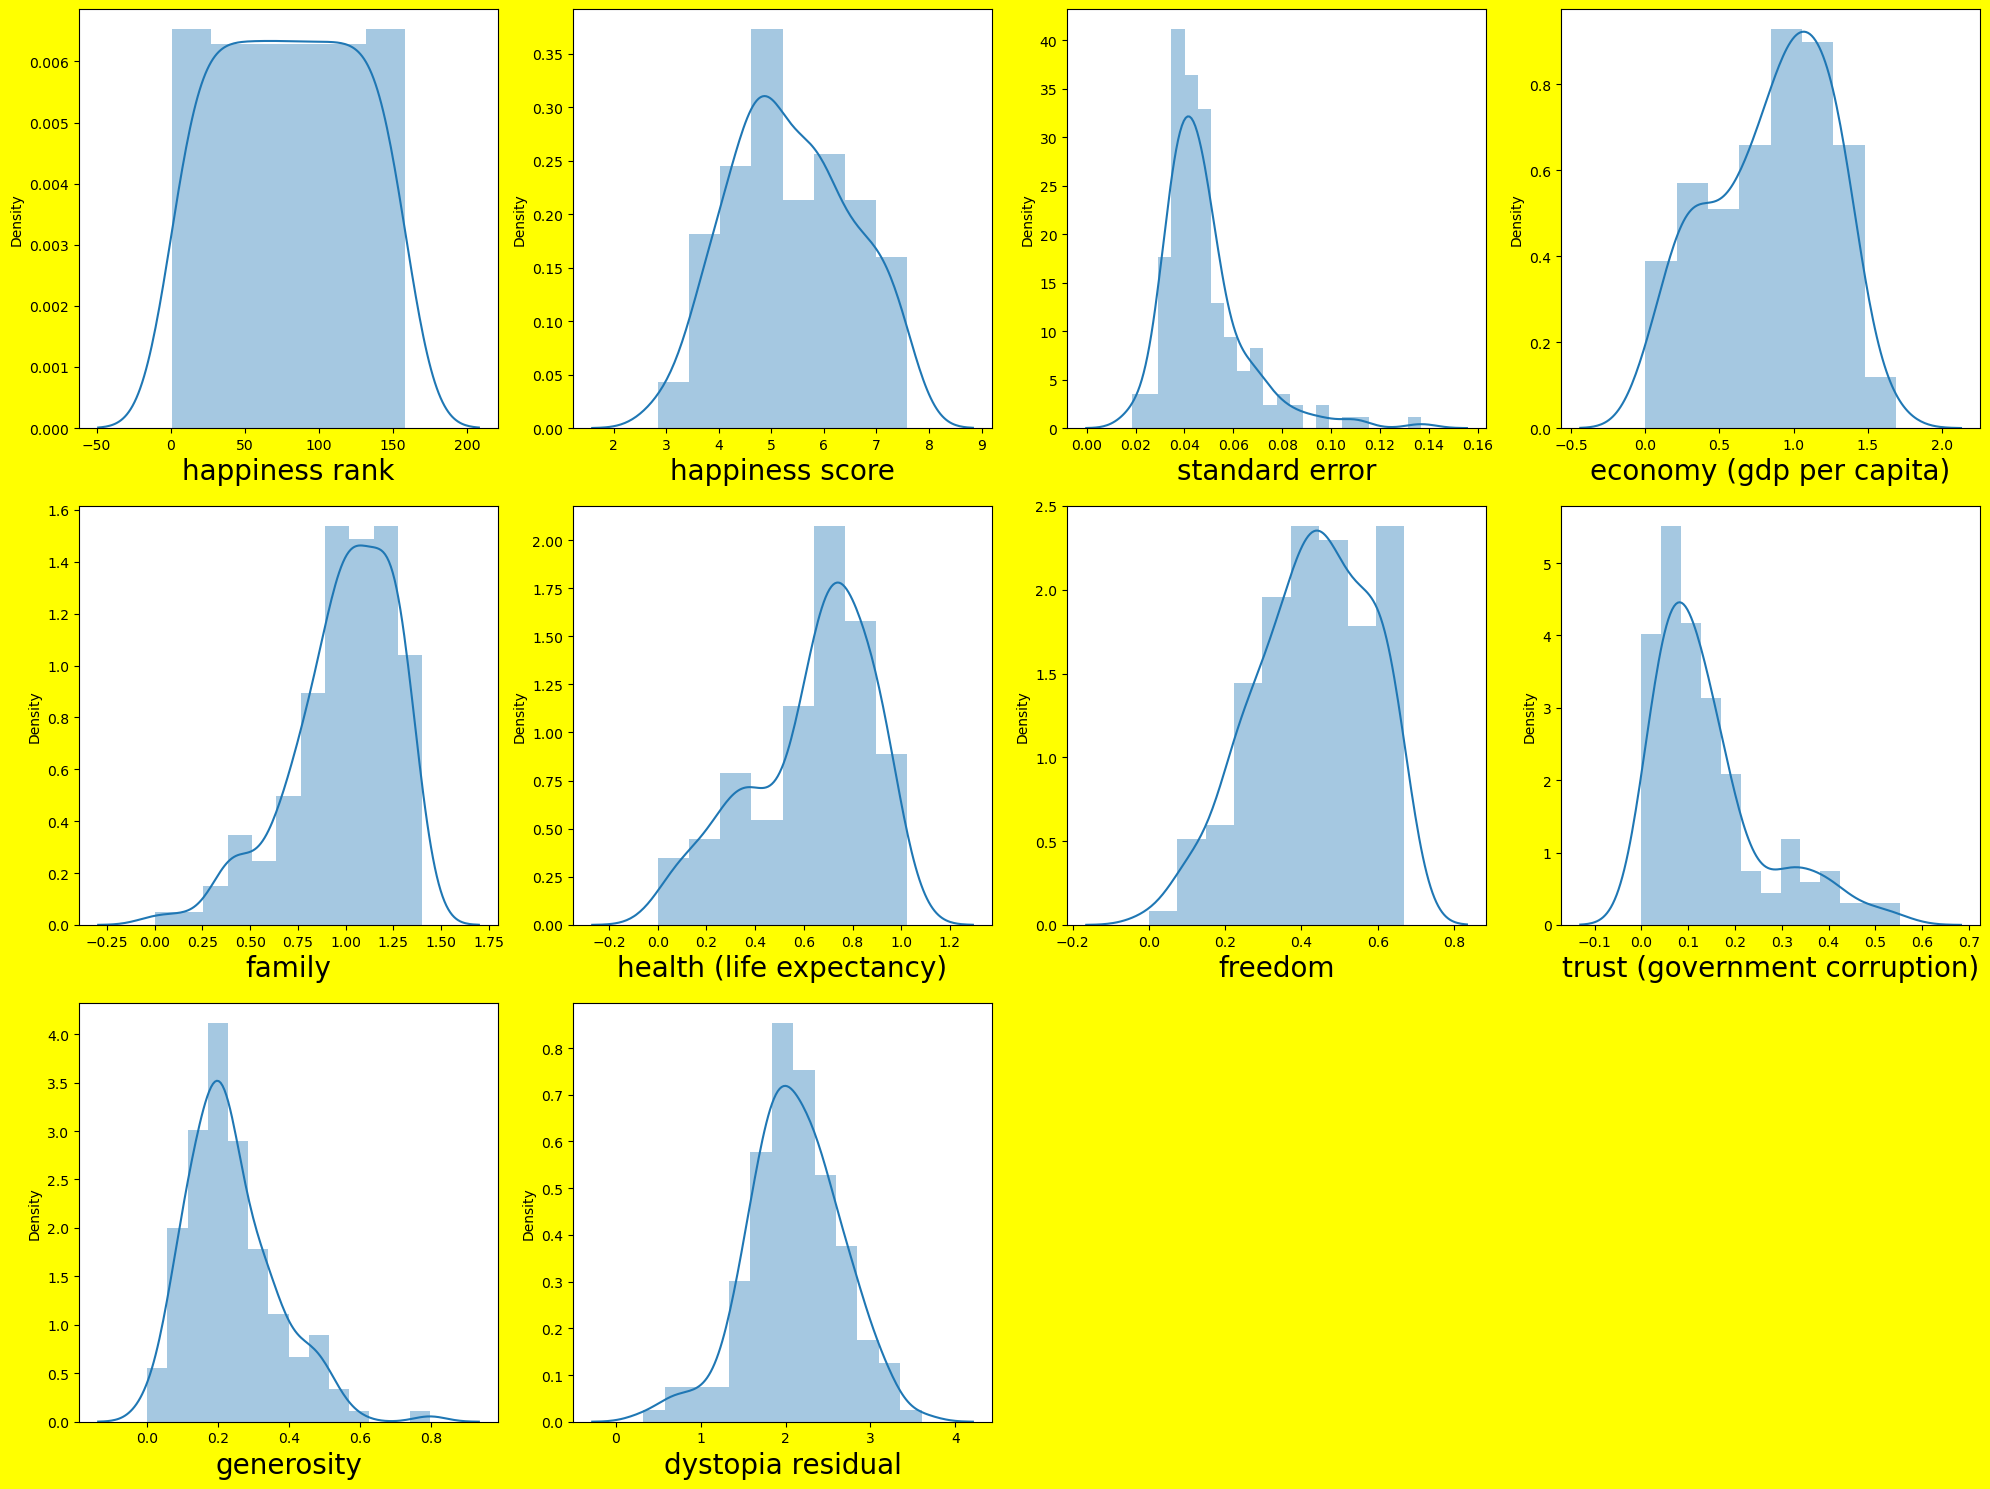

In [157]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'yellow')
plotnumber = 1

for column in whd_df[num_cols]:
    if plotnumber <=10:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(whd_df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

- From the above distribution plot, We noticed that the data almost looks mormaly distributed in happiness score,Economy,Freedom,health 

- from above graph it is clearly shown that standerd error, family, trust and generosity are highly skewed data

# Checking For Skewness

In [158]:
whd_df.skew()

happiness rank                   0.000418
happiness score                  0.097769
standard error                   1.983439
economy (gdp per capita)        -0.317575
family                          -1.006893
health (life expectancy)        -0.705328
freedom                         -0.413462
trust (government corruption)    1.385463
generosity                       1.001961
dystopia residual               -0.238911
dtype: float64

- Here it is clearly shown that standard error, family, trust and generosity are highly skewed data

In [159]:
whd_df['standard error']=np.cbrt(whd_df['standard error'])


In [160]:
whd_df['trust (government corruption)']=np.cbrt(whd_df['trust (government corruption)'])

In [161]:
whd_df['generosity']=np.cbrt(whd_df['generosity'])

In [162]:
whd_df.skew()

happiness rank                   0.000418
happiness score                  0.097769
standard error                   0.979748
economy (gdp per capita)        -0.317575
family                          -1.006893
health (life expectancy)        -0.705328
freedom                         -0.413462
trust (government corruption)    0.011932
generosity                      -0.961079
dystopia residual               -0.238911
dtype: float64

- Here it is clearly shown that skewness has been reduced from standard error, family, trust and generosity columns

 Distplot After removing skewness:-


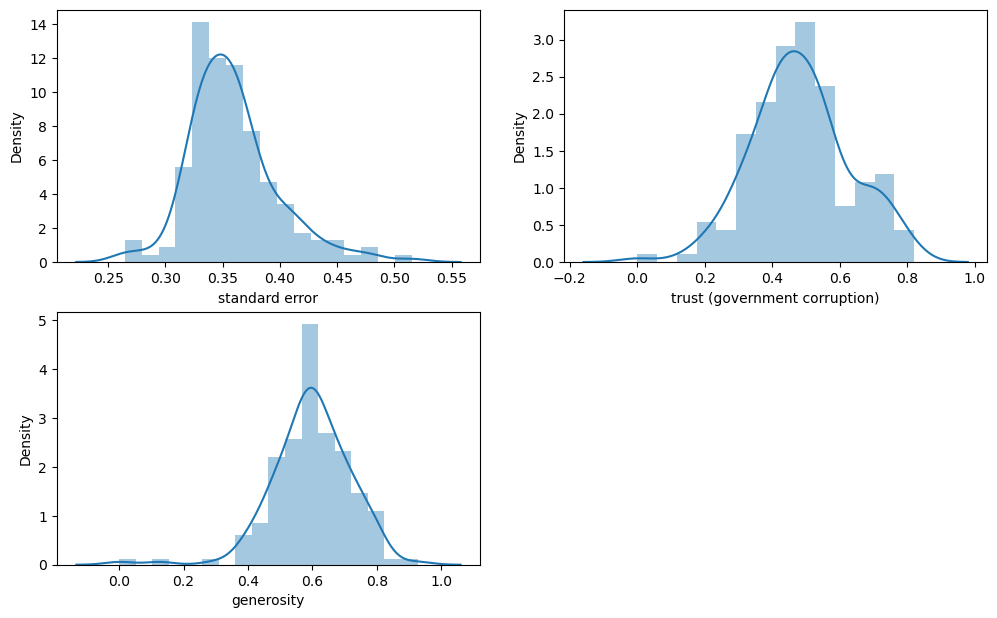

In [163]:
print(' Distplot After removing skewness:-')
skewed_columns=['standard error','trust (government corruption)','generosity']
plt.figure(figsize=(12,19))
for i in enumerate(skewed_columns):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(whd_df[i[1]])
plt.show()

- we observe from above observation, skewness was removed from targeted three column Looks like normally distributed

# Checking Correlation

In [164]:
whd_df.corr()

,happiness rank,happiness score,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
happiness rank,1.000000,-0.992105,0.182211,-0.785267,-0.733644,-0.735613,-0.556886,-0.304207,-0.141914,-0.521999
happiness score,-0.992105,1.000000,-0.201754,0.780966,0.740605,0.724200,0.568211,0.326229,0.159029,0.530474
standard error,0.182211,-0.201754,1.000000,-0.224064,-0.132005,-0.321062,-0.159027,-0.158530,-0.054081,0.063299
economy (gdp per capita),-0.785267,0.780966,-0.224064,1.000000,0.645299,0.816478,0.370300,0.205482,-0.059576,0.040059
family,-0.733644,0.740605,-0.132005,0.645299,1.000000,0.531104,0.441518,0.131653,0.066803,0.148117
health (life expectancy),-0.735613,0.724200,-0.321062,0.816478,0.531104,1.000000,0.360477,0.149556,0.044395,0.018979
freedom,-0.556886,0.568211,-0.159027,0.370300,0.441518,0.360477,1.000000,0.461105,0.398210,0.062783
trust (government corruption),-0.304207,0.326229,-0.158530,0.205482,0.131653,0.149556,0.461105,1.000000,0.266991,0.010769
generosity,-0.141914,0.159029,-0.054081,-0.059576,0.066803,0.044395,0.398210,0.266991,1.000000,-0.061511
dystopia residual,-0.521999,0.530474,0.063299,0.040059,0.148117,0.018979,0.062783,0.010769,-0.061511,1.000000


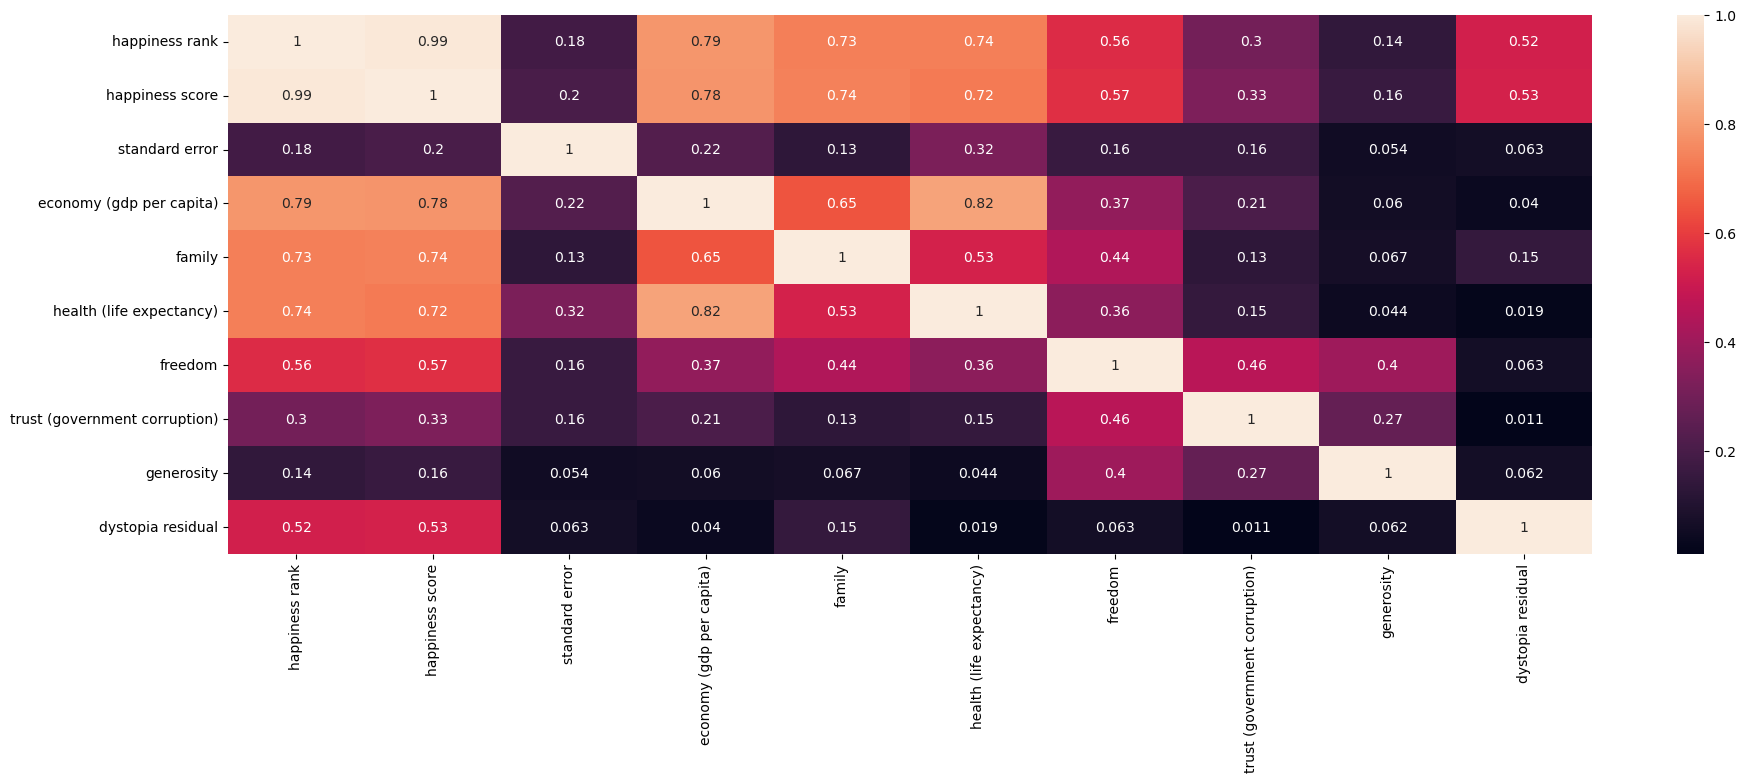

In [165]:
# Plot the heatmap
import matplotlib.pyplot as plt

df_corr=whd_df.corr().abs()
plt.figure(figsize=(22,7))
sns.heatmap(df_corr, annot=True)
plt.show()

- lighter color shows high corelation. from above observation it is cleared that happiness score is highly corelated with 
1.economy 
2.family 3.health
- We can see generosity and Standard error not correlated with Happiness score

In [166]:
df=whd_df
df

,country,region,happiness rank,happiness score,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
0,Switzerland,Western Europe,1,7.587,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,Iceland,Western Europe,2,7.561,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,Denmark,Western Europe,3,7.527,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,Norway,Western Europe,4,7.522,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,Canada,North America,5,7.427,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.325981,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.331896,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.368771,0.66320,0.47489,0.72193,0.15684,0.573940,0.778484,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.442391,0.01530,0.41587,0.22396,0.11850,0.465116,0.582130,1.83302


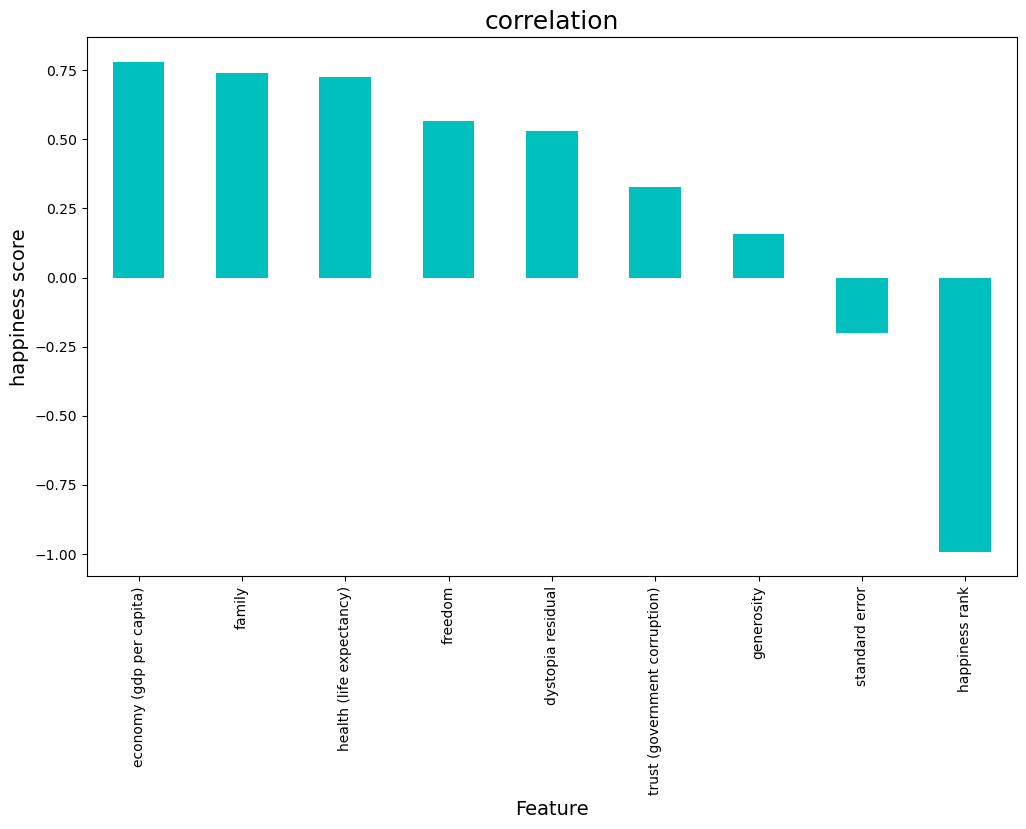

In [167]:
# Correlation of features with Target Column a)Average Cost for two
plt.figure(figsize=(12,7))
whd_df.corr()['happiness score'].sort_values(ascending=False).drop(['happiness score']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('happiness score',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

- We can see the highest positive correlated column with Happiness score is Economy,Family,Health,Freedom,Trust.


# diving data in (features)x and (lables)y

In [169]:
df=whd_df[num_cols]

In [170]:
df

,happiness rank,happiness score,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
0,1,7.587,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,2,7.561,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,3,7.527,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,4,7.522,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,5,7.427,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.325981,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371,0.67042
154,155,3.340,0.331896,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327,1.63328
155,156,3.006,0.368771,0.66320,0.47489,0.72193,0.15684,0.573940,0.778484,0.32858
156,157,2.905,0.442391,0.01530,0.41587,0.22396,0.11850,0.465116,0.582130,1.83302


In [171]:
# dropping Happiness rank beacuse having no use to predict happiness score
df=df.drop(['happiness rank'],axis=1)


In [172]:
x=df.drop(['happiness score'],axis=1)
y=df['happiness score']

print('Features Diamension = ',x.shape)
print('Label Diamension = ',y.shape)

Features Diamension =  (158, 8)
Label Diamension =  (158,)


# Data Scaling

In [173]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale,columns=x.columns)

In [174]:
x=pd.DataFrame(data=x_scale)
x

,standard error,economy (gdp per capita),family,health (life expectancy),freedom,trust (government corruption),generosity,dystopia residual
0,-0.892612,1.369621,1.320281,1.263408,1.577438,1.826993,0.576890,0.758258
1,0.172283,1.135226,1.514458,1.289434,1.332456,0.260958,1.325808,1.092857
2,-0.961125,1.192861,1.361054,0.992229,1.469659,2.075620,0.837993,0.712335
3,-0.524996,1.525130,1.251922,1.035145,1.605131,1.592625,0.869128,0.663893
4,-0.777930,1.194876,1.221204,1.118054,1.360416,1.428028,1.427657,0.639337
...,...,...,...,...,...,...,...,...
153,-0.849442,-1.552987,-0.800520,-0.818610,1.087740,2.318782,0.104570,-2.588925
154,-0.696643,-1.392303,-2.346860,-1.263362,0.372033,-0.357762,-0.239847,-0.843967
155,0.255966,-0.455245,-1.901086,0.372199,-1.809238,0.624780,1.489900,-3.208430
156,2.157804,-2.067566,-2.118467,-1.649648,-2.064472,-0.123602,-0.118581,-0.481985


- We scaled the data using Standerd Scalarization

# Checking Multi-Collinearity

In [175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_function():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

vif_function()

   VIF Factor                       Features
0    1.145955                 standard error
1    4.054420       economy (gdp per capita)
2    1.953511                         family
3    3.325083       health (life expectancy)
4    1.816154                        freedom
5    1.349249  trust (government corruption)
6    1.318466                     generosity
7    1.042987              dystopia residual


- We can see no column having high VIF, and thus we can say multicollinearity is not present in the columns

# Data Modelling

In [176]:
#importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [177]:
# Finding Best Random State
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum R2 score is ",maxAccu," on Random_state ",maxRS)

Maximum R2 score is  0.9985341262944935  on Random_state  145


# Splitting data into Train-Test

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [179]:
x_train.shape

(110, 8)

In [180]:
x_test.shape

(48, 8)

In [181]:
y_train.shape

(110,)

In [182]:
y_test.shape

(48,)

# 1. Linear Regression

In [183]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_lr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_lr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_lr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_lr)*100))

R2 score on test data  99.85341262944935
R2 score on train data  99.57226599582279
Mean Absolute Error  3.9145038147787616
Mean Squared Error: 0.23670616633910355
Root Meand Squared Error: 0.48652457937816823


In [184]:
# cv score for Linear Regression 
cvlr=cross_val_score(lr,x,y,cv=5).mean()
print('CV score  for Linear rgerssion:',cvlr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_lr)-cvlr)

CV score  for Linear rgerssion: 0.8718763973856627
And Difference between CV and r2_score = 0.12665772890883076


# 2. Support Vector Regressor

In [185]:
svr=SVR()
svr.fit(x_train,y_train)
pred_svr=svr.predict(x_test)
pred_train=svr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_svr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_svr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_svr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_svr)*100))

R2 score on test data  91.2213738027757
R2 score on train data  98.69952352994068
Mean Absolute Error  21.010188031629383
Mean Squared Error: 14.175538759328866
Root Meand Squared Error: 3.7650416676749896


In [186]:
# cv score for Support Vector Regressor
cvsvr=cross_val_score(svr,x,y,cv=5).mean()
print('CV score  for Support Vector Regressor:',cvsvr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_svr)-cvsvr)

CV score  for Support Vector Regressor: -2.4963266062405998
And Difference between CV and r2_score = 3.408540344268357


# 3. Decision Tree Regressor

In [187]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_dtr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_dtr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_dtr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_dtr)*100))

R2 score on test data  79.46849618426835
R2 score on train data  100.0
Mean Absolute Error  45.02708333333334
Mean Squared Error: 33.15383541666666
Root Meand Squared Error: 5.757936732603673


In [188]:
# cv score for Decision Tree Regressor
cvdtr=cross_val_score(dtr,x,y,cv=5).mean()
print('CV score  for Decision Tree Regressor:',cvdtr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_dtr)-cvdtr)

CV score  for Decision Tree Regressor: -7.4723970835934965
And Difference between CV and r2_score = 8.26708204543618


# 4. K Neighbors Regressor

In [189]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_knn)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_knn)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_knn)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_knn)*100))

R2 score on test data  90.6173314472458
R2 score on train data  91.4880153515676
Mean Absolute Error  29.013333333333353
Mean Squared Error: 15.150933500000017
Root Meand Squared Error: 3.892420005600631


In [190]:
# cv score for K Neighbors Regressor
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score  for K Neighbors Regressor:',cvknn)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_knn)-cvknn)

CV score  for K Neighbors Regressor: -5.170538273011673
And Difference between CV and r2_score = 6.076711587484131


# 5.Random Forest Regressor

In [191]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
pred_train=rfr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_rfr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_rfr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_rfr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rfr)*100))

R2 score on test data  89.89314653541493
R2 score on train data  98.52559707093403
Mean Absolute Error  28.905541666666718
Mean Squared Error: 16.320331883750036
Root Meand Squared Error: 4.039843051870956


In [192]:
# cv score for Random Forest Regressor
cvrfr=cross_val_score(rfr,x,y,cv=5).mean()
print('CV score  for Random Forest Regressor:',cvrfr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_rfr)-cvrfr)

CV score  for Random Forest Regressor: -3.2057750894169166
And Difference between CV and r2_score = 4.104706554771066


# 6.Ada Boost Regressor

In [193]:
adr=AdaBoostRegressor()
adr.fit(x_train,y_train)
pred_adr=adr.predict(x_test)
pred_train=adr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_adr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_adr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_adr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_adr)*100))

R2 score on test data  89.46660109884913
R2 score on train data  95.39164608093498
Mean Absolute Error  29.77616820618994
Mean Squared Error: 17.009108377111286
Root Meand Squared Error: 4.124210030673909


In [194]:
# cv score for Ada Boost Regressor
cvadr=cross_val_score(adr,x,y,cv=5).mean()
print('CV score  for Ada Boost Regressor:',cvadr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_adr)-cvadr)

CV score  for Ada Boost Regressor: -6.197347208180561
And Difference between CV and r2_score = 7.092013219169052


# 7.Gradient Boosting Regressor

In [195]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_gbr)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_gbr)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_gbr)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_gbr)*100))

R2 score on test data  93.86657927750798
R2 score on train data  99.93542587596843
Mean Absolute Error  20.62085142615787
Mean Squared Error: 9.904117253158285
Root Meand Squared Error: 3.1470807509751455


In [196]:
# cv score for Gradient Boosting Regressor
cvgbr=cross_val_score(gbr,x,y,cv=5).mean()
print('CV score  for Gradient Boosting Regressor:',cvgbr)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_gbr)-cvgbr)

CV score  for Gradient Boosting Regressor: -2.2594998567865674
And Difference between CV and r2_score = 3.198165649561647


# 8. Lasso Regression

In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [198]:
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
pred_train=ls.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_ls)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_ls)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_ls)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_ls)*100))


R2 score on test data  96.51959559135797
R2 score on train data  96.35077501199054
Mean Absolute Error  18.729878669971104
Mean Squared Error: 5.6200829702082435
Root Meand Squared Error: 2.370671417596341


In [199]:
# cv score for Lasso Regression
cvls=cross_val_score(ls,x,y,cv=5).mean()
print('CV score  for Lasso Regression:',cvls)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_ls)-cvls)

CV score  for Lasso Regression: -0.6198004403700587
And Difference between CV and r2_score = 1.5849963962836382


# 9. Ridge Regression

In [202]:
rg=Ridge(alpha=0.1)
rg.fit(x_train,y_train)
pred_rg=rg.predict(x_test)
pred_train=rg.predict(x_train)
print("R2 score on test data ",r2_score(y_test,pred_rg)*100)
print("R2 score on train data ",r2_score(y_train,pred_train)*100)
print("Mean Absolute Error ",mean_absolute_error(y_test,pred_rg)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred_rg)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred_rg)*100))


R2 score on test data  99.85183283080761
R2 score on train data  99.57222957099941
Mean Absolute Error  3.9417707430908715
Mean Squared Error: 0.239257191564989
Root Meand Squared Error: 0.4891392353563441


In [203]:
# cv score forRidge Regression
cvrg=cross_val_score(rg,x,y,cv=5).mean()
print('CV score  for Ridge Regression:',cvrg)
print("And Difference between CV and r2_score =", r2_score(y_test,pred_rg)-cvrg)

CV score  for Ridge Regression: 0.8715667992407254
And Difference between CV and r2_score = 0.12695152906735063


# We can see Difference between CV and r2_score of Linear Regression and Ridge Regression is Less. So we go with one of them.

# We can choose Liner Regression

# Hyper Parameter Tuning

In [204]:
lr.get_params() # Getting Liner Regression Parameters

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [205]:
from sklearn.model_selection import GridSearchCV

parameter = {'copy_X':['True'], 
             'fit_intercept':['True'],
             'n_jobs': ['None'],
             'normalize':['deprecated'],
              'positive':['False'] }

In [206]:
# Start Tuning 
lr=LinearRegression()
GCV = GridSearchCV(lr,parameter,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_) 

{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 'None', 'normalize': 'deprecated', 'positive': 'False'}


In [212]:
model=LinearRegression(copy_X='True', fit_intercept= 'True', n_jobs= 'None', normalize= 'deprecated', positive= 'False')
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("R2 score on test data ",r2_score(y_test,pred)*100)

print("Mean Absolute Error ",mean_absolute_error(y_test,pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,pred)*100)
print("Root Meand Squared Error:",np.sqrt(mean_squared_error(y_test,pred)*100))



R2 score on test data  99.85148511166697
Mean Absolute Error  3.870187427011868
Mean Squared Error: 0.23981868103324244
Root Meand Squared Error: 0.48971285569529666


# Saving the best Regressor model

In [213]:
import joblib

joblib.dump(model,'model.obj')

['model.obj']

In [214]:
best_model=joblib.load('model.obj')

In [215]:
# Viewing Attributes of the best model
best_model

LinearRegression(copy_X='True', fit_intercept='True', n_jobs='None',
                 positive='False')

In [217]:
original = np.array(y_test)
predicted = np.array(best_model.predict(x_test))
df_new1 = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new1.sample(10)

,Original,Predicted
21,6.786,6.835036
30,5.102,5.125740
20,7.527,7.412444
27,4.514,4.530577
19,6.670,6.702589
12,3.819,3.846963
32,3.931,3.963550
8,4.694,4.727154
33,6.329,6.411062
43,5.833,5.704573


Text(0.5, 1.0, 'Original vs predicted  graph')

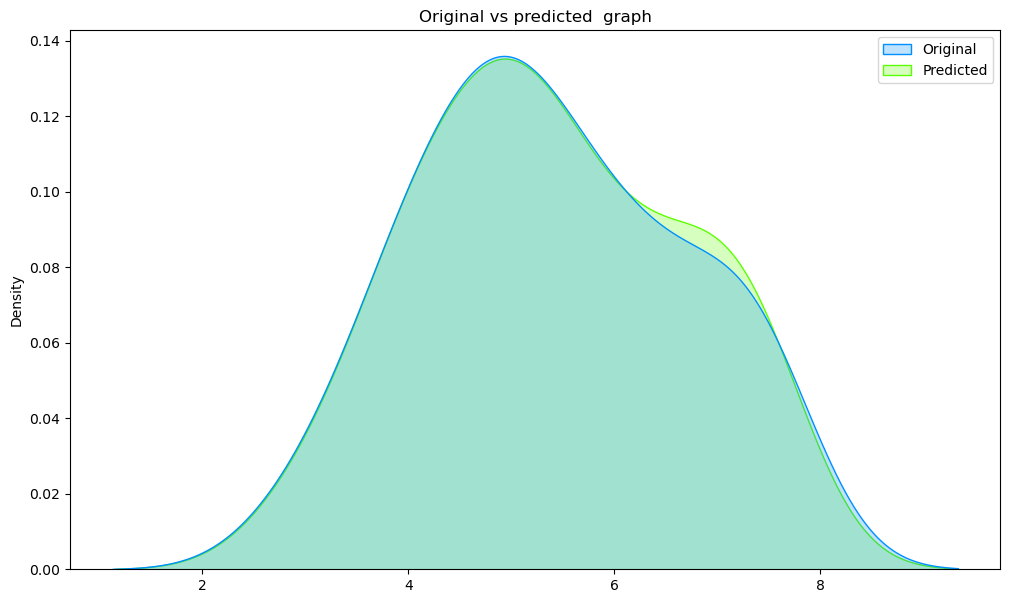

In [218]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new1, palette='gist_rainbow_r',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

- We can see the the predicted graph follows original graph majorly